In [3]:
# Import all required libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

# Set constants
batch_size = 64
epochs = 70
img_size = (48, 48)
train_dir = '/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'

# Set up image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

print(f"✅ Found {train_generator.samples} training images.")
print(f"✅ Found {val_generator.samples} validation images.")

# Build CNN model
model = Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3, 3), padding='same'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(256, (3, 3), padding='same'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")

# Create folder to store checkpoints
os.makedirs("/kaggle/working/checkpoints", exist_ok=True)

# Custom callback to save every 10 epochs
from tensorflow.keras.callbacks import Callback

class SaveEveryNEpochs(Callback):
    def __init__(self, save_freq, model):
        super(SaveEveryNEpochs, self).__init__()
        self.save_freq = save_freq
        self.model_ref = model

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_freq == 0:
            filename = f"/kaggle/working/checkpoints/checkpoint_epoch_{epoch + 1:02d}.weights.h5"
            self.model_ref.save_weights(filename)
            print(f"Checkpoint saved at: {filename}")

checkpoint_callback = SaveEveryNEpochs(save_freq=10, model=model)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
✅ Found 28709 training images.
✅ Found 7178 validation images.
Model compiled successfully.


In [4]:
# Train the model (for full 70 epochs)
print("Starting model training...")

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_callback],
    verbose=1
)

print("✅ Training completed.")

Starting model training...
Epoch 1/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.3437 - loss: 1.7549 - val_accuracy: 0.2547 - val_loss: 1.7754
Epoch 2/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.5313 - loss: 1.2354 - val_accuracy: 0.4145 - val_loss: 1.7830
Epoch 3/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.6164 - loss: 1.0302 - val_accuracy: 0.5201 - val_loss: 1.3117
Epoch 4/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.6811 - loss: 0.8657 - val_accuracy: 0.5135 - val_loss: 1.3808
Epoch 5/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.7530 - loss: 0.6925 - val_accuracy: 0.5488 - val_loss: 1.3105
Epoch 6/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.8239 - loss: 0.5038 - val_accuracy: 0.5549 - val_loss: 1.4861
Epoch 7/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8901 - loss: 0.3286 - val_accuracy: 0.5691 - val_loss: 1.5057
Epoch 8/70
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accurac

In [6]:
# Save final model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")
print("✅ Final model saved (model.json + model.h5).")


✅ Final model saved (model.json + model.h5).


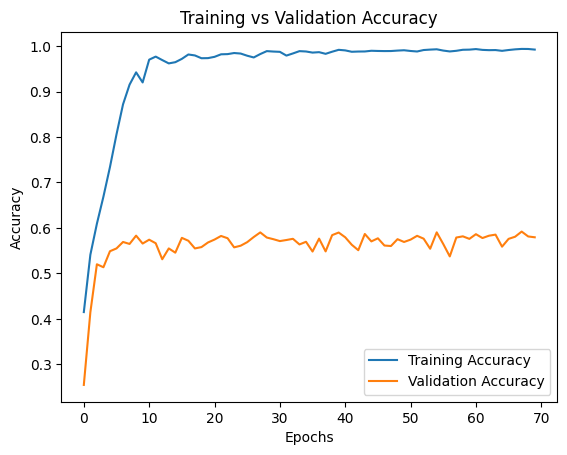

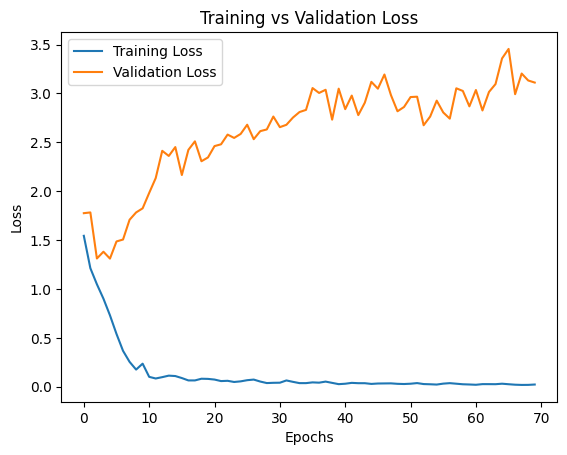

In [7]:
# ✅ Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
!zip -r /kaggle/working/working_dir_backup.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/model.weights.h5 (deflated 7%)
  adding: kaggle/working/checkpoints/ (stored 0%)
  adding: kaggle/working/checkpoints/checkpoint_epoch_30.weights.h5 (deflated 8%)
  adding: kaggle/working/checkpoints/checkpoint_epoch_20.weights.h5 (deflated 8%)
  adding: kaggle/working/checkpoints/checkpoint_epoch_70.weights.h5 (deflated 7%)
  adding: kaggle/working/checkpoints/checkpoint_epoch_10.weights.h5 (deflated 8%)
  adding: kaggle/working/checkpoints/checkpoint_epoch_50.weights.h5 (deflated 7%)
  adding: kaggle/working/checkpoints/checkpoint_epoch_60.weights.h5 (deflated 7%)
  adding: kaggle/working/checkpoints/checkpoint_epoch_40.weights.h5 (deflated 7%)
  adding: kaggle/working/.ipynb_checkpoints/ (stored 0%)
  adding: kaggle/working/model.json (deflated 92%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
